In [3]:
import scipy
import numpy
import matplotlib
import sklearn
import tqdm

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Req. 1. 선형 회귀 모델 구현

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from drive.MyDrive.subpjt1.models.linear_model import LinearModel

### Req. 1-1 데이터 읽기 및 시각화

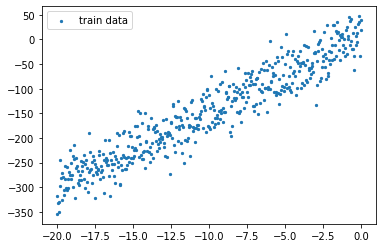

In [33]:
# 데이터 불러오기
train_data = np.load("/content/drive/MyDrive/subpjt1/datasets/linear_train.npy")
test_x = np.load("/content/drive/MyDrive/subpjt1/datasets/linear_test_x.npy")

# tf 형식에 맞게 변환
x_data = np.expand_dims(train_data[:,0], axis=1)
y_data = train_data[:,1]

plt.scatter(x_data,y_data,s=5,label="train data")
plt.legend()
plt.show()

### Req. 1-2 ~ 1-5

Epoch 1/10
16/16 [==============================] - 0s 911us/step - loss: 5591.3823 - mean_squared_error: 5591.3823
Epoch 2/10
16/16 [==============================] - 0s 800us/step - loss: 925.6088 - mean_squared_error: 925.6088
Epoch 3/10
16/16 [==============================] - 0s 774us/step - loss: 917.3115 - mean_squared_error: 917.3115
Epoch 4/10
16/16 [==============================] - 0s 851us/step - loss: 925.2407 - mean_squared_error: 925.2407
Epoch 5/10
16/16 [==============================] - 0s 924us/step - loss: 923.7029 - mean_squared_error: 923.7029
Epoch 6/10
16/16 [==============================] - 0s 954us/step - loss: 928.0927 - mean_squared_error: 928.0927
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 925.6031 - mean_squared_error: 925.6031
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 928.8147 - mean_squared_error: 928.8147
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 923.4725 - mean_sq

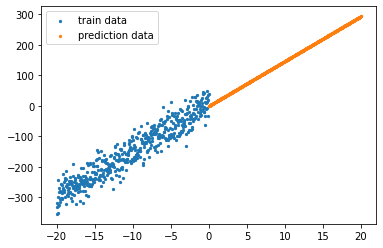

Model: "linear_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Req. 1-2
# 모델 생성
model = LinearModel(num_units=1)

# Req. 1-3
# 최적화 함수, 손실함수와 모델 바인딩
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
			  loss=tf.keras.losses.MSE,
			  metrics=[tf.keras.metrics.MeanSquaredError()])

# Req. 1-4
# 모델 학습
model.fit(x=x_data, 
		  y=y_data, 
		  epochs=10, 
		  batch_size=32)


# Req. 1-5
# 모델 테스트
prediction = model.predict(x=test_x,
    					   batch_size=None)


# 결과 시각화
plt.scatter(x_data,y_data,s=5,label="train data")
plt.scatter(test_x,prediction,s=5,label="prediction data")
plt.legend()
plt.show()


# 모델 정리
model.summary()

# Req. 2. 이미지 캡셔닝

# Req. 3. 이미지 캡셔닝 데이터 전처리


In [57]:
import pandas as pd
 
captions = pd.read_csv('/content/drive/MyDrive/subpjt1/datasets/captions.csv', error_bad_lines=False, encoding='cp949')
captions

image_list = captions.loc[:, :1]
caption_list = captions.loc[:, 1:]

print(image_list)

b'Skipping line 3: expected 1 fields, saw 2\nSkipping line 22: expected 1 fields, saw 4\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 48: expected 1 fields, saw 2\nSkipping line 68: expected 1 fields, saw 2\nSkipping line 92: expected 1 fields, saw 4\nSkipping line 93: expected 1 fields, saw 3\nSkipping line 94: expected 1 fields, saw 2\nSkipping line 97: expected 1 fields, saw 3\nSkipping line 99: expected 1 fields, saw 2\nSkipping line 101: expected 1 fields, saw 2\nSkipping line 117: expected 1 fields, saw 2\nSkipping line 133: expected 1 fields, saw 2\nSkipping line 187: expected 1 fields, saw 3\nSkipping line 202: expected 1 fields, saw 3\nSkipping line 208: expected 1 fields, saw 2\nSkipping line 222: expected 1 fields, saw 2\nSkipping line 238: expected 1 fields, saw 2\nSkipping line 241: expected 1 fields, saw 2\nSkipping line 247: expected 1 fields, saw 3\nSkipping line 252: expected 1 fields, saw 2\nSkipping line 278: expected 1 fields, saw 3\nSkipping line 292: 

TypeError: ignored